In [40]:
# importing pytorch as an API for the network
import torch
import numpy
import os
import pandas as pd
import argparse
import h5py
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import itertools


In [3]:
# Test out some pytorch functionality

In [7]:

def train_autoencoder(data_path, model_path, batch_size, epochs, learning_rate, momentum, weight_decay, num_workers, log_interval):
    """
    Description:
    ------------
    Train a very simple binary classifier on signal stau stau
    and background ttbar data, save the model to the given path.

    """
    # Specifying the data keys and label key for use in the data loader
    
    df = pd.read_hdf(input_data_path, key='fraud_dataset')
    X = StandardScaler().fit_transform(df)
    X_tensor = torch.tensor(X, dtype=torch.float32)
    
    fraud_dataset = TensorDataset(X_tensor)
    
    # Load the data
    train_dataloader = torch.utils.data.DataLoader(fraud_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)


    
    # Define the auto endocder, I am going to start with just a few layers, the total number of input features is X
    model = torch.nn.Sequential(
        torch.nn.Linear(11, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 10),
        torch.nn.ReLU(),
        torch.nn.Linear(10, 20),
        torch.nn.ReLU(),
        torch.nn.Linear(20, 50),
        torch.nn.ReLU(),
        torch.nn.Linear(50, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100, 100),
        torch.nn.ReLU(),
        torch.nn.Linear(100,11),
    )

    # Define the loss function
    loss_function = torch.nn.MSELoss()

    # Define the optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum, weight_decay=weight_decay)



    # Train the model
    model.train()
    for epoch in range(epochs):
        for batch_idx, batch in enumerate(train_dataloader):
            # print(batch_idx, batch)
            optimizer.zero_grad()
            output = model(batch[0])

            loss = loss_function(output, batch[0])
            loss.backward()
            optimizer.step()

            correct_predictions = 0
            total_samples = 0

            # print(batch_idx % log_interval)
            if batch_idx % log_interval == 0:
                print("Epoch {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}".format(
                    epoch, batch_idx * len(batch[0]), len(train_dataloader.dataset),
                    100. * batch_idx / len(train_dataloader), loss.item()
                    ))

    # Save the model
    torch.save(model, model_path)




In [8]:
input_data_path = "./credit_card_fraud.h5"
# df.head()



In [9]:
train_autoencoder("./credit_card_fraud.h5", "./model.h5", 2512, 50, .01, 0.9,0.0001, 4,1)

Epoch 0 [0/2512 (0%)]	Loss: 1.002219
Epoch 1 [0/2512 (0%)]	Loss: 1.002208
Epoch 2 [0/2512 (0%)]	Loss: 1.002186
Epoch 3 [0/2512 (0%)]	Loss: 1.002156
Epoch 4 [0/2512 (0%)]	Loss: 1.002117
Epoch 5 [0/2512 (0%)]	Loss: 1.002072
Epoch 6 [0/2512 (0%)]	Loss: 1.002021
Epoch 7 [0/2512 (0%)]	Loss: 1.001965
Epoch 8 [0/2512 (0%)]	Loss: 1.001906
Epoch 9 [0/2512 (0%)]	Loss: 1.001844
Epoch 10 [0/2512 (0%)]	Loss: 1.001779
Epoch 11 [0/2512 (0%)]	Loss: 1.001713
Epoch 12 [0/2512 (0%)]	Loss: 1.001646
Epoch 13 [0/2512 (0%)]	Loss: 1.001578
Epoch 14 [0/2512 (0%)]	Loss: 1.001510
Epoch 15 [0/2512 (0%)]	Loss: 1.001443
Epoch 16 [0/2512 (0%)]	Loss: 1.001377
Epoch 17 [0/2512 (0%)]	Loss: 1.001311
Epoch 18 [0/2512 (0%)]	Loss: 1.001247
Epoch 19 [0/2512 (0%)]	Loss: 1.001184
Epoch 20 [0/2512 (0%)]	Loss: 1.001123
Epoch 21 [0/2512 (0%)]	Loss: 1.001064
Epoch 22 [0/2512 (0%)]	Loss: 1.001007
Epoch 23 [0/2512 (0%)]	Loss: 1.000952
Epoch 24 [0/2512 (0%)]	Loss: 1.000901
Epoch 25 [0/2512 (0%)]	Loss: 1.000851
Epoch 26 [0/2512 (0%)]

In [15]:
import torch.nn.functional as F
df = pd.read_hdf(input_data_path, key='fraud_dataset')
X = StandardScaler().fit_transform(df)
X_tensor = torch.tensor(X, dtype=torch.float32)


loaded_model = torch.load("./model.h5")
# Switch the model to evaluation mode
loaded_model.eval()

# Calculate reconstruction errors for the entire dataset
with torch.no_grad():
    reconstructed = loaded_model(X_tensor)
    reconstruction_errors = F.mse_loss(reconstructed, X_tensor, reduction='none')  # Per element
    sample_errors = reconstruction_errors.mean(dim=1)  # Mean error per sample

# Convert to NumPy for easier handling (optional)
sample_errors_np = sample_errors.numpy()

(array([ 18.,  40.,  93., 179., 248., 366., 333., 307., 269., 211., 140.,
         99.,  64.,  35.,  18.,   9.,   8.,   4.,   4.,   3.,   2.,   2.,
          1.,   3.,   3.,   2.,   3.,   6.,   2.,   4.,   2.,   0.,   2.,
          0.,   0.,   0.,   3.,   1.,   6.,   2.,   4.,   7.,   3.,   1.,
          1.,   2.,   1.,   0.,   0.,   1.]),
 array([0.12324535, 0.23560527, 0.34796518, 0.46032512, 0.57268506,
        0.68504494, 0.79740489, 0.90976483, 1.02212477, 1.13448465,
        1.24684453, 1.35920453, 1.47156441, 1.58392429, 1.69628429,
        1.80864418, 1.92100406, 2.03336406, 2.14572406, 2.25808382,
        2.37044382, 2.48280382, 2.59516358, 2.70752358, 2.81988358,
        2.93224335, 3.04460335, 3.15696335, 3.26932311, 3.38168311,
        3.49404311, 3.60640287, 3.71876287, 3.83112288, 3.94348264,
        4.0558424 , 4.1682024 , 4.2805624 , 4.3929224 , 4.5052824 ,
        4.6176424 , 4.73000193, 4.84236193, 4.95472193, 5.06708193,
        5.17944193, 5.29180193, 5.40416145, 5.

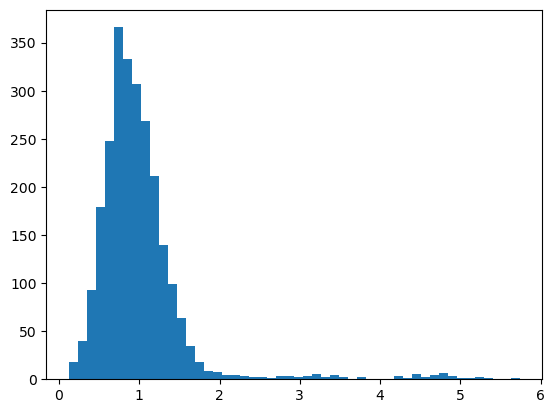

In [18]:
from matplotlib import pyplot as plt
plt.hist(sample_errors_np, bins=50)

In [19]:
# Add the MSE as a column to the original table
df["MSE"] = sample_errors_np

In [62]:
def create_histo_2d(x_var, y_var, dataset):
    # 2D histogram for Z-Score fraud detection
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["MSE"]>2,
        palette={True: 'red', False: 'blue'},
        alpha=0.7
    )
    plt.title('AutoEncoder Fraud Detection', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud', 
               labels=['Fraud', 'Normal'], 
               fontsize=12)
    plt.grid(True)
    plt.show()

def create_histo_1d(x_var, dataset):
    # Histogram for plotting the frequency of a variable occurrence
    plt.figure(figsize=(6, 4))
    sns.histplot(
        x=dataset[x_var],
        alpha=0.7
    )
    plt.title(x_var, fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.grid(True)
    plt.show()
    
def create_scatter(x_var, y_var,dataset,folder):
    # Creates a 2D scatterplot for Z-Score fraud detection
    plt.figure(figsize=(6, 4))
    markers = {True: "s", False: "X"}
    sns.scatterplot(
        x=dataset[x_var],
        y=dataset[y_var],
        hue=dataset["MSE"]>2,
        # palette={"Fraud": 'red', "Normal": 'blue'},
        palette={True: 'red', False: 'blue'},
        markers=markers,
        alpha=0.7
    )
    plt.title('AutoEncoder Fraud Detection', fontsize=16)
    plt.xlabel(x_var, fontsize=14)
    plt.ylabel(y_var, fontsize=14)
    plt.legend(title='Fraud Potential', 
               # labels=["Fraud", "Normal"], 
               fontsize=12)
    plt.grid(True)
    plt.savefig("{}/{}_vs_{}.png".format(folder, x_var, y_var))
    plt.show()
    

In [63]:
df['MSE_Fraud'] = df['MSE'] > 2

# Renaming the True and False Flags for proper coloring
# df["MSE_Fraud"] = df["MSE"].map({True: "Fraud", False: "Normal"})


# Determining the total number of fraud cases
# fraud_count =(df["MSE_Fraud"]=="Fraud").sum()
fraud_count =(df["MSE_Fraud"]==True).sum()


# Of all the cases, there are some that have a statstical anamoly enough for the auto encoder to pickup, and constitue fraud, these are
print("{} out of {} data entries have fraud characteristics, or {}% of the sample".format(fraud_count, df["MSE"].count(),100*fraud_count/df["MSE"].count()))


76 out of 2512 data entries have fraud characteristics, or 3.0254777070063694% of the sample


In [64]:
df["MSE_Fraud"].head()

0    False
1    False
2    False
3    False
4    False
Name: MSE_Fraud, dtype: bool

In [65]:
df.columns

Index(['TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate', 'TransactionDate_hour',
       'TransactionWeekNumber', 'DaysSinceLastPurchase', 'MSE', 'MSE_Fraud'],
      dtype='object')

TransactionType Channel


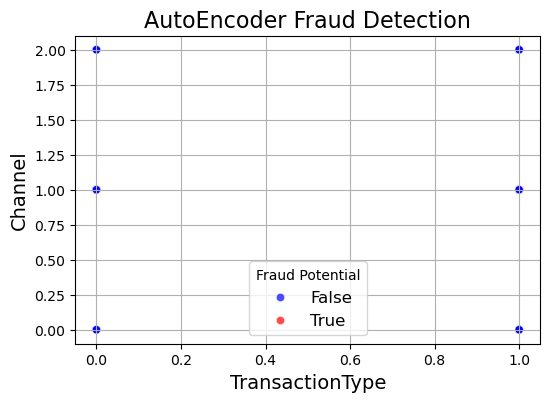

TransactionType CustomerAge


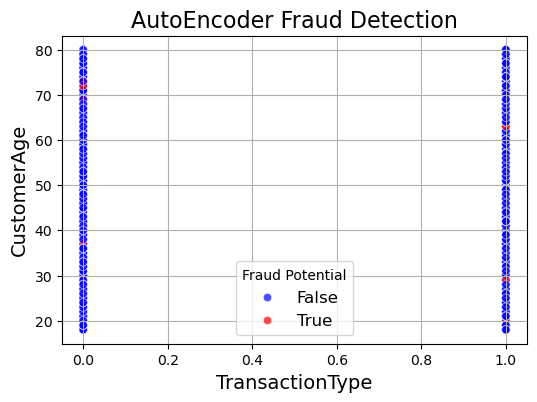

TransactionType CustomerOccupation


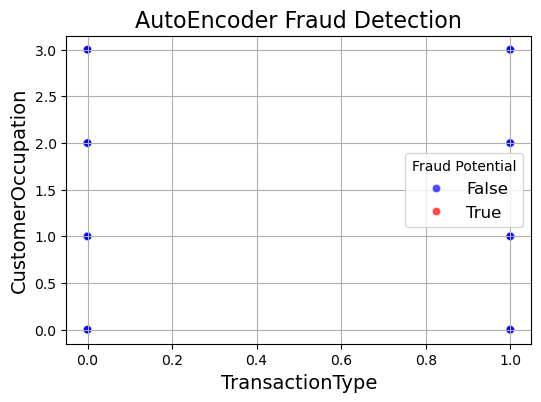

TransactionType TransactionDuration


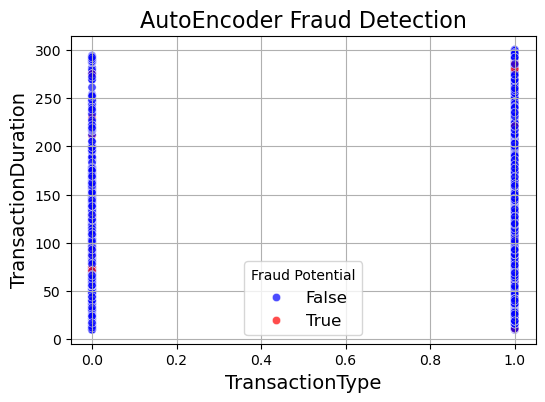

TransactionType LoginAttempts


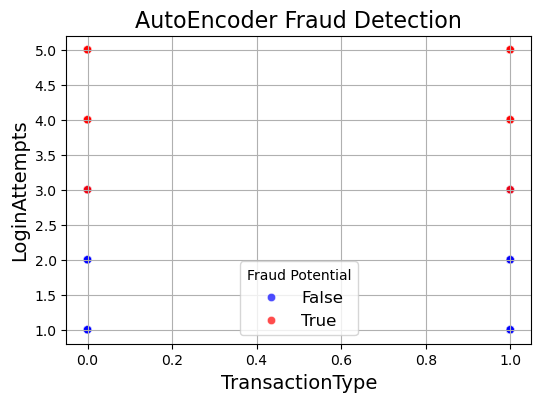

TransactionType AccountBalance


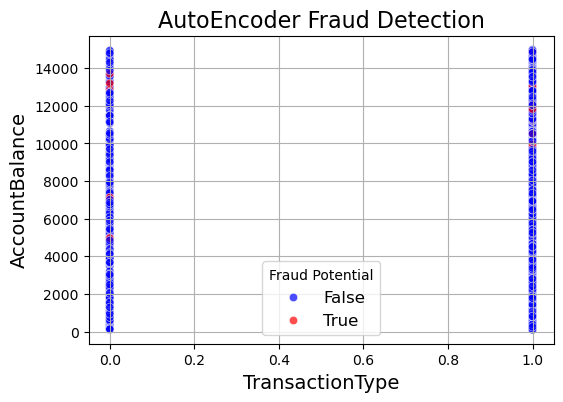

TransactionType PreviousTransactionDate


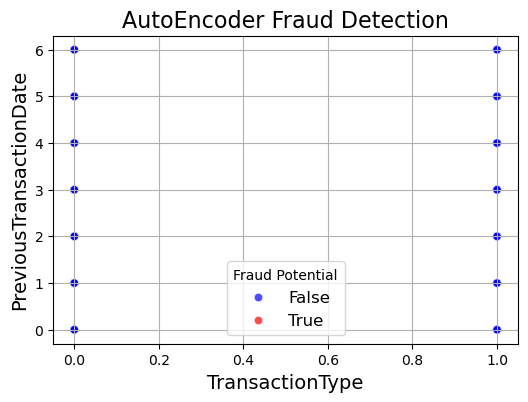

TransactionType TransactionDate_hour


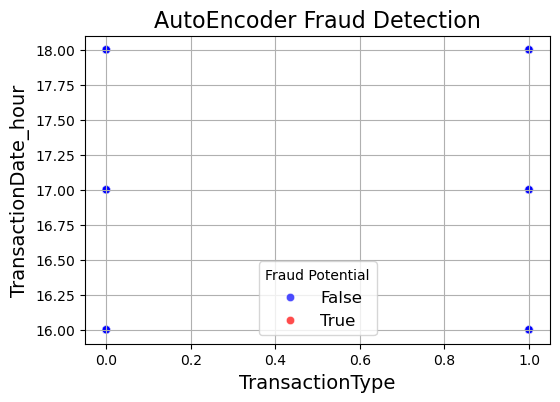

TransactionType TransactionWeekNumber


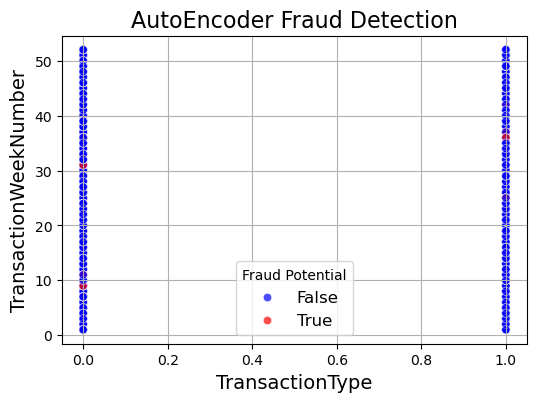

TransactionType DaysSinceLastPurchase


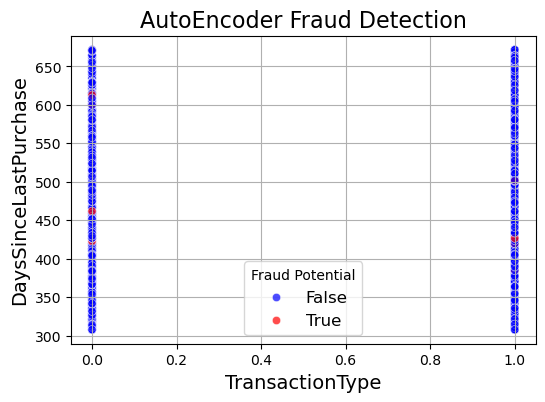

Channel CustomerAge


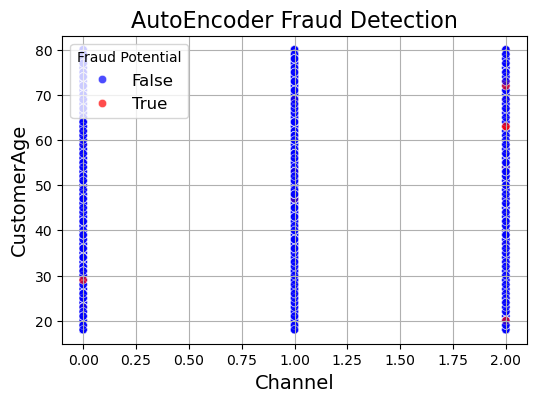

Channel CustomerOccupation


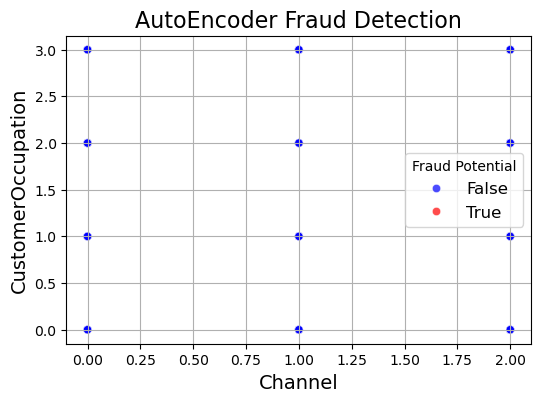

Channel TransactionDuration


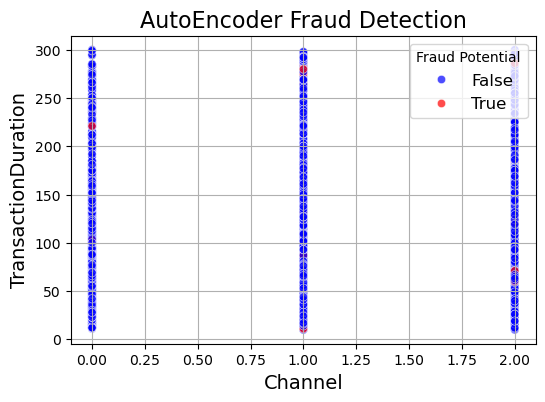

Channel LoginAttempts


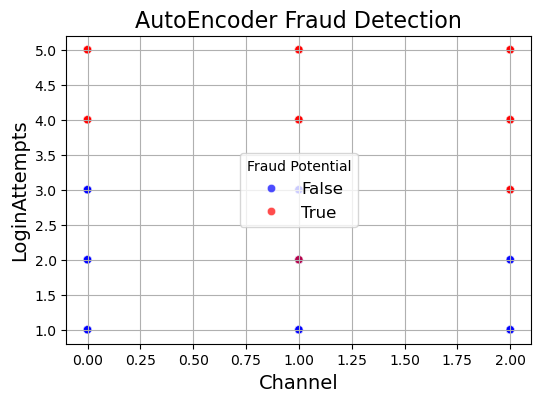

Channel AccountBalance


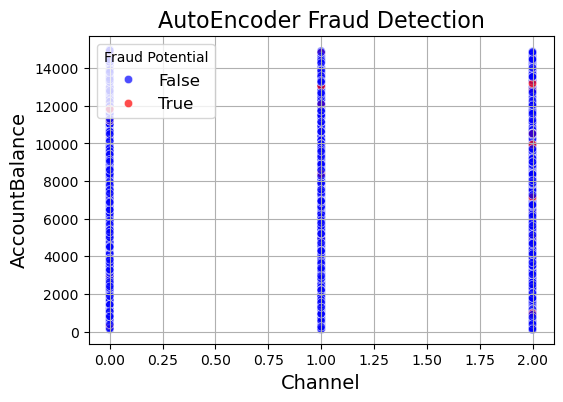

Channel PreviousTransactionDate


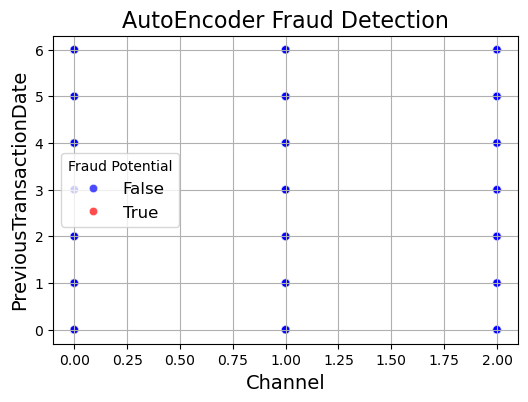

Channel TransactionDate_hour


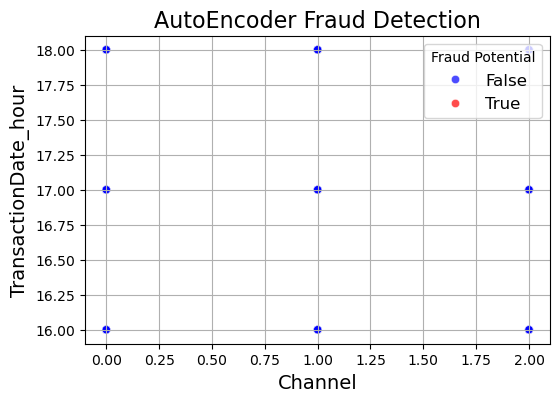

Channel TransactionWeekNumber


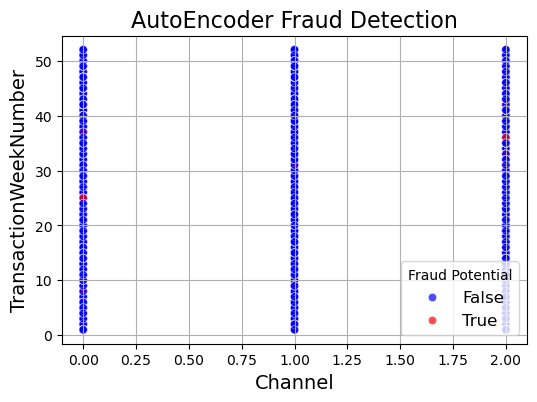

Channel DaysSinceLastPurchase


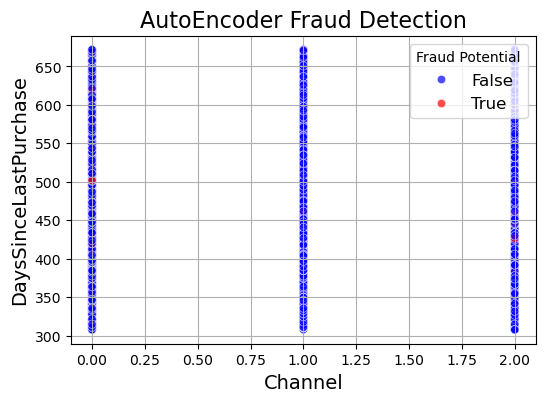

CustomerAge CustomerOccupation


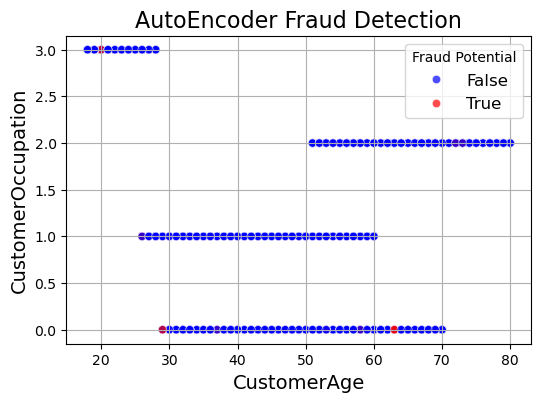

CustomerAge TransactionDuration


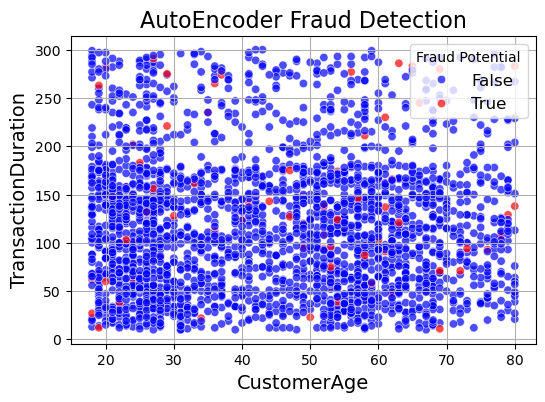

CustomerAge LoginAttempts


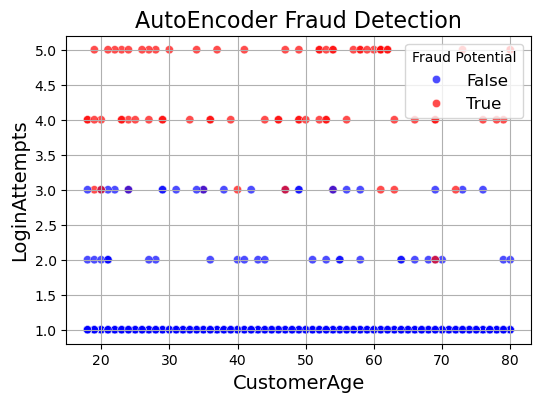

CustomerAge AccountBalance


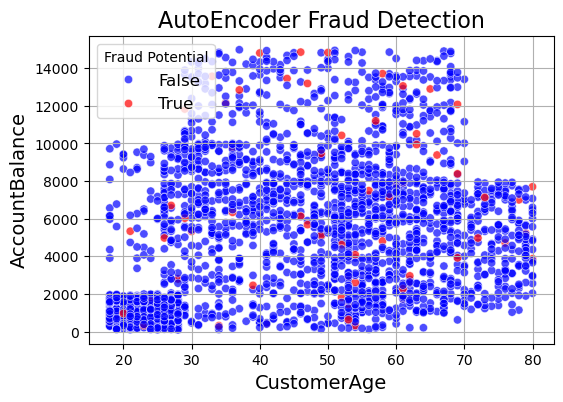

CustomerAge PreviousTransactionDate


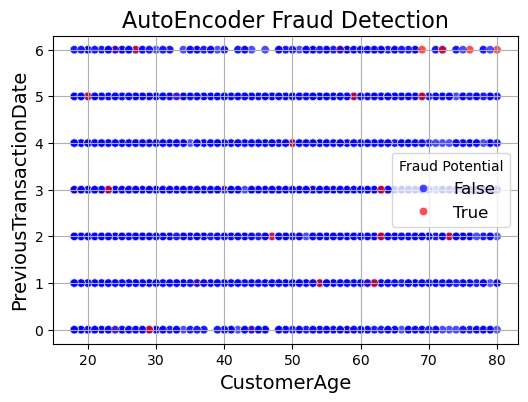

CustomerAge TransactionDate_hour


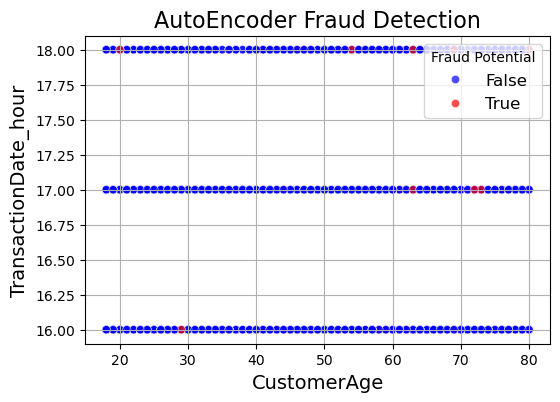

CustomerAge TransactionWeekNumber


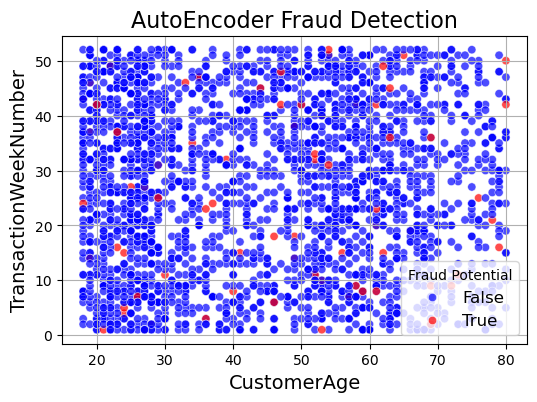

CustomerAge DaysSinceLastPurchase


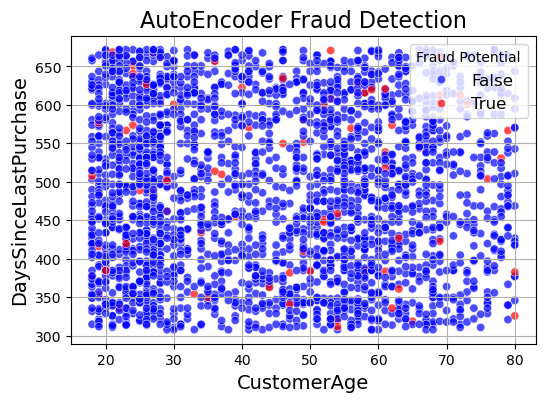

CustomerOccupation TransactionDuration


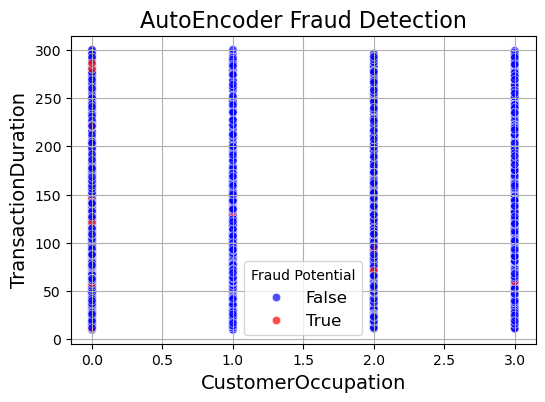

CustomerOccupation LoginAttempts


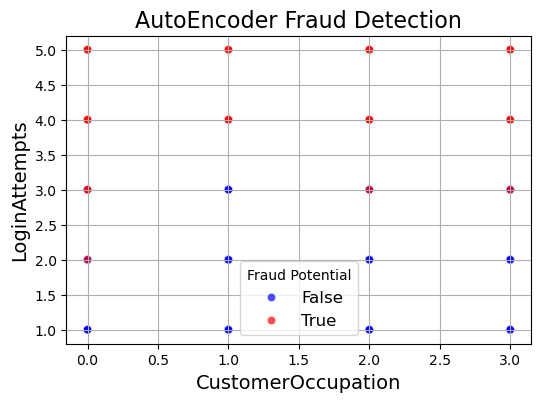

CustomerOccupation AccountBalance


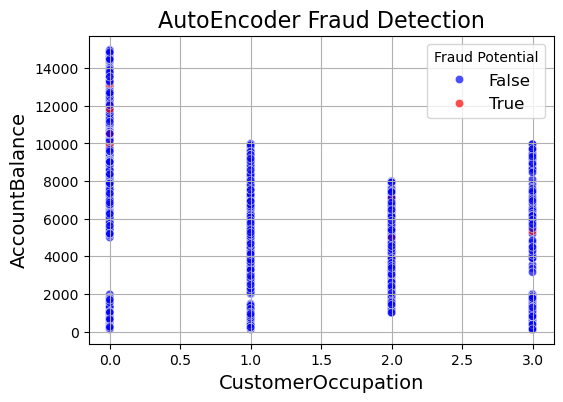

CustomerOccupation PreviousTransactionDate


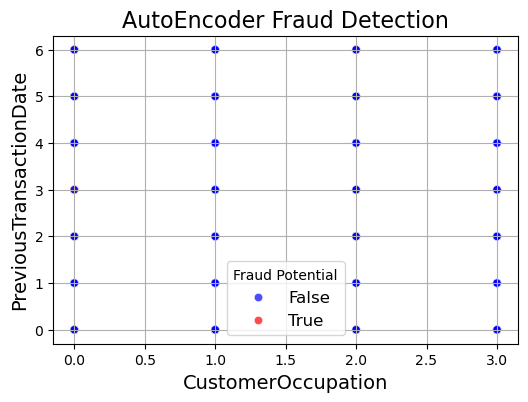

CustomerOccupation TransactionDate_hour


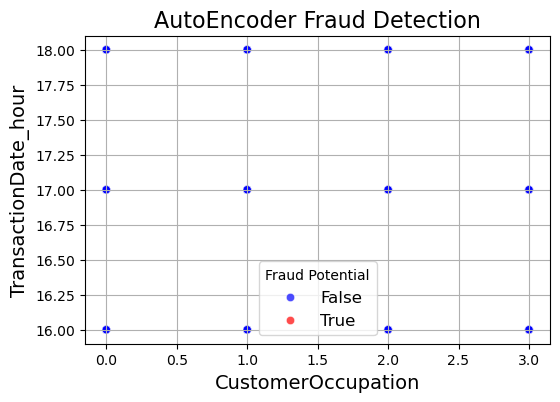

CustomerOccupation TransactionWeekNumber


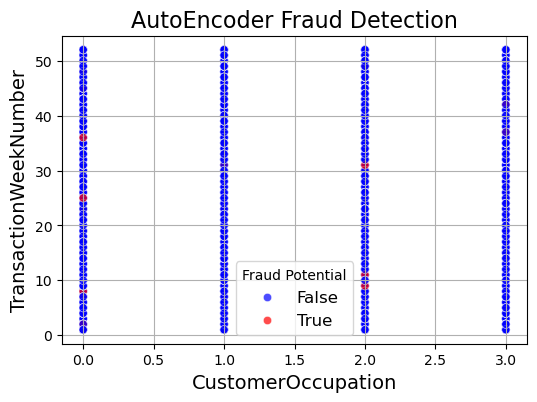

CustomerOccupation DaysSinceLastPurchase


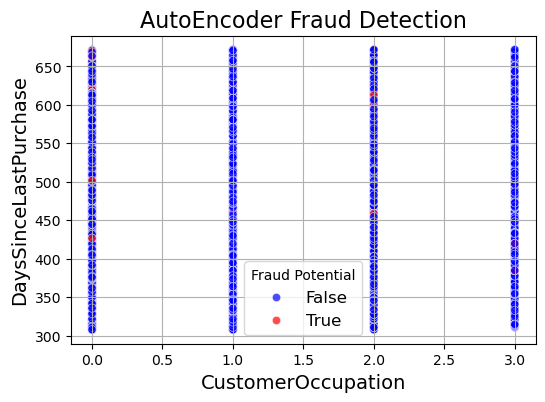

TransactionDuration LoginAttempts


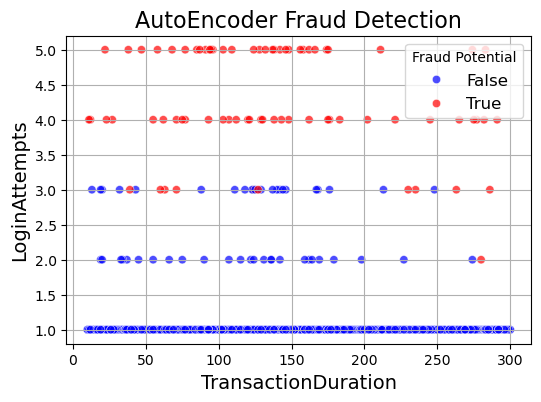

TransactionDuration AccountBalance


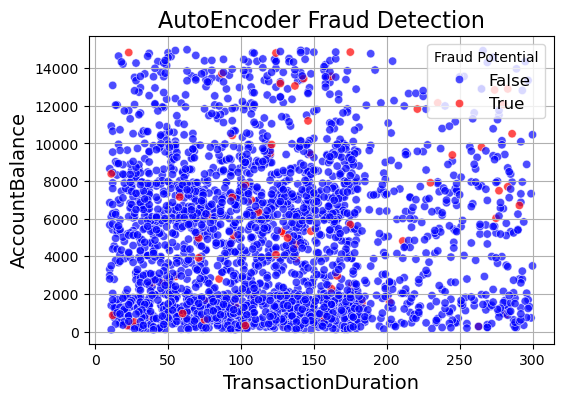

TransactionDuration PreviousTransactionDate


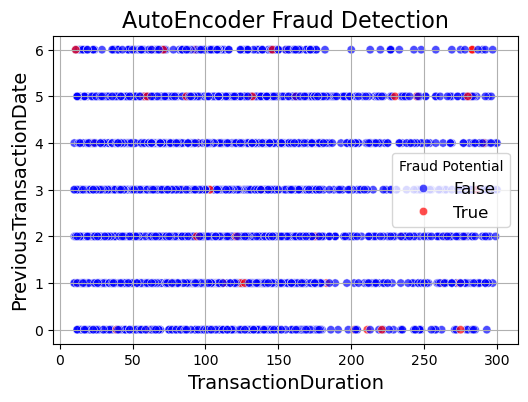

TransactionDuration TransactionDate_hour


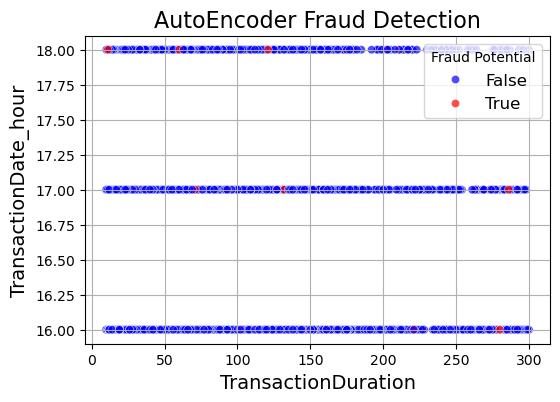

TransactionDuration TransactionWeekNumber


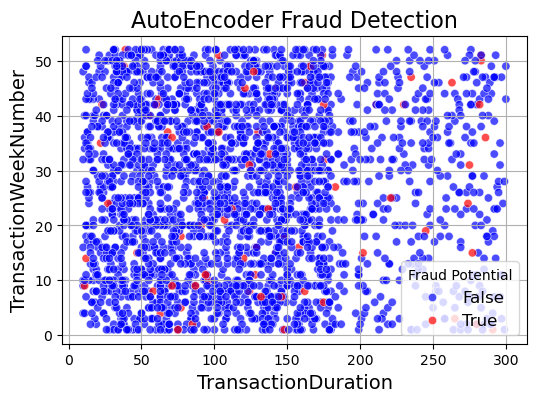

TransactionDuration DaysSinceLastPurchase


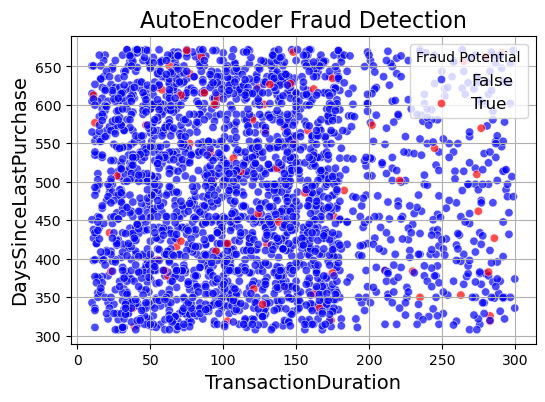

LoginAttempts AccountBalance


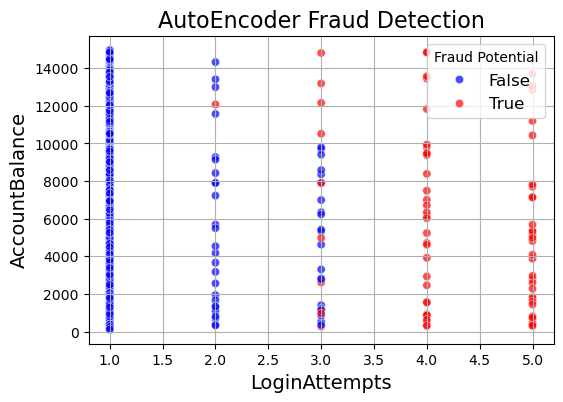

LoginAttempts PreviousTransactionDate


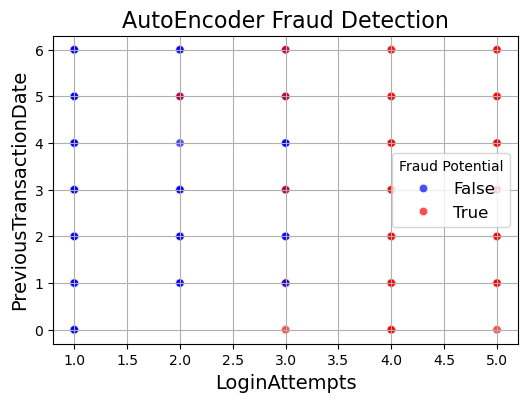

LoginAttempts TransactionDate_hour


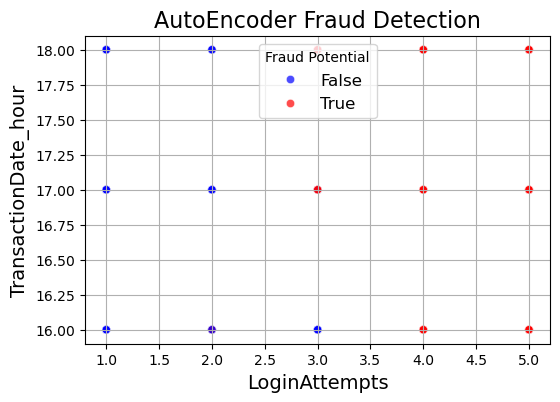

LoginAttempts TransactionWeekNumber


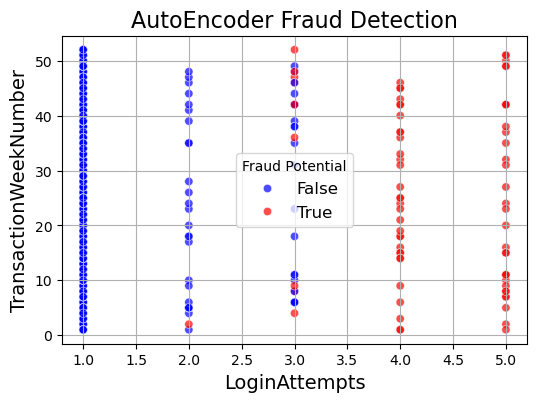

LoginAttempts DaysSinceLastPurchase


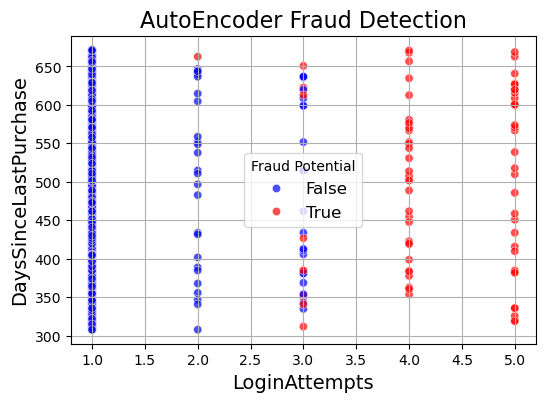

AccountBalance PreviousTransactionDate


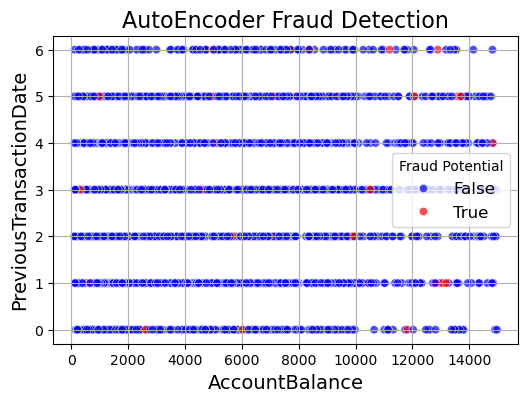

AccountBalance TransactionDate_hour


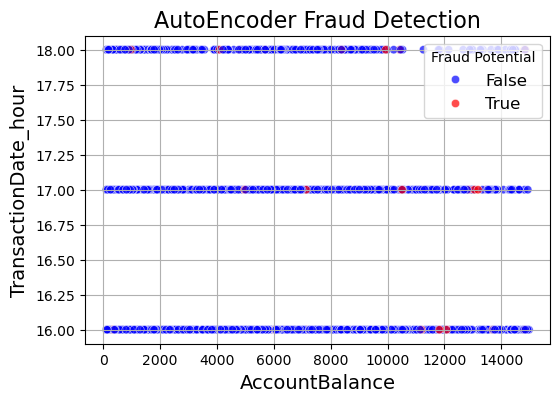

AccountBalance TransactionWeekNumber


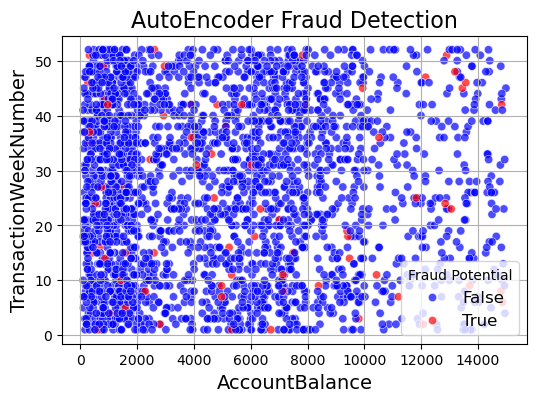

AccountBalance DaysSinceLastPurchase


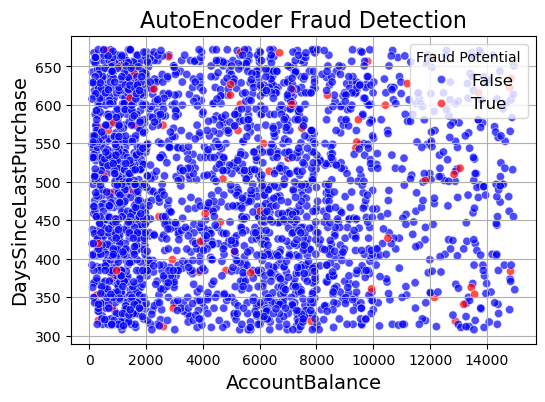

PreviousTransactionDate TransactionDate_hour


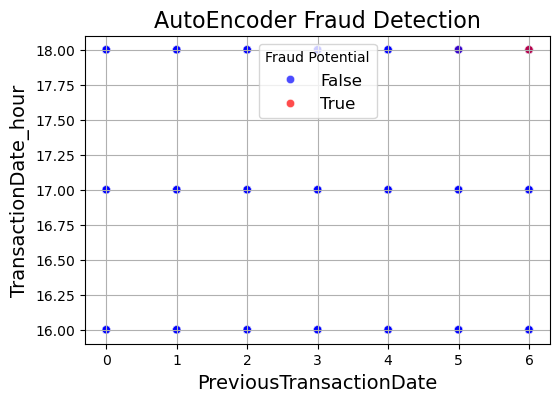

PreviousTransactionDate TransactionWeekNumber


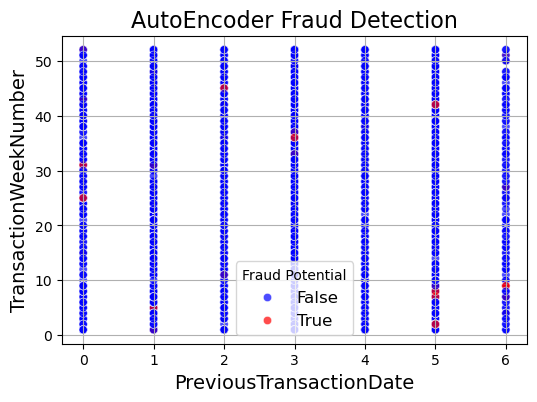

PreviousTransactionDate DaysSinceLastPurchase


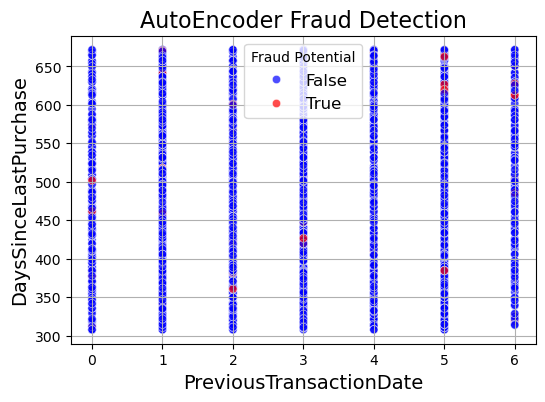

TransactionDate_hour TransactionWeekNumber


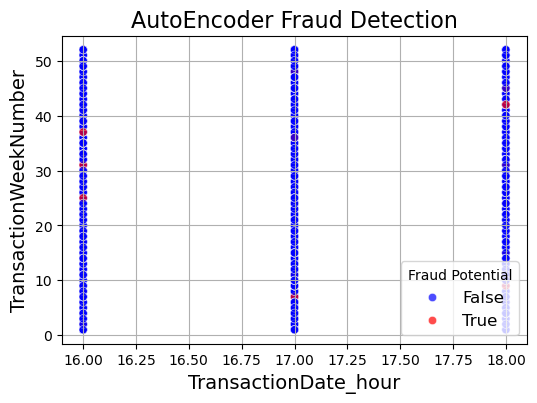

TransactionDate_hour DaysSinceLastPurchase


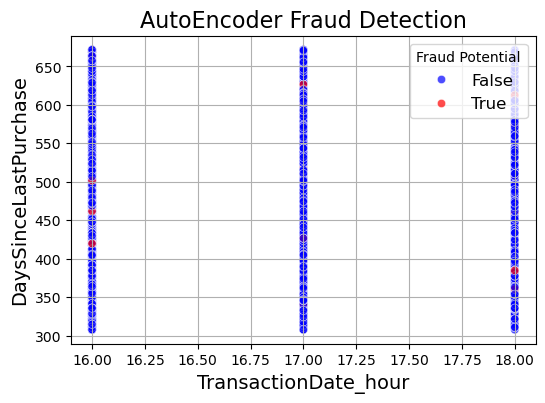

TransactionWeekNumber DaysSinceLastPurchase


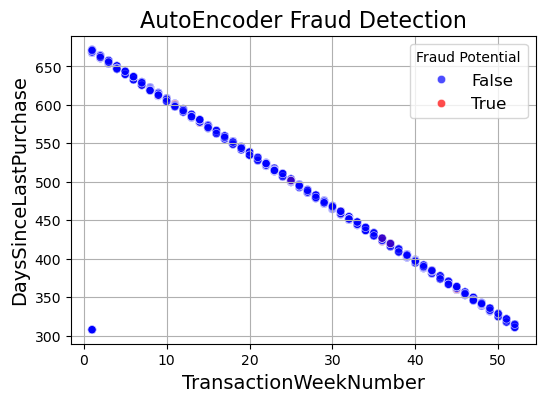

In [66]:
# Defining all of the variables that I want to plot, and creating combinations of pairs for a 2D plot
numeric_cols = ['TransactionType', 'Channel', 'CustomerAge', 'CustomerOccupation',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate', 'TransactionDate_hour',
       'TransactionWeekNumber', 'DaysSinceLastPurchase']
combinations = list(itertools.combinations(numeric_cols, 2))
for pair in combinations:
    print(pair[0],pair[1])
    create_scatter(pair[0],pair[1], df, "autoencoder_plots")
